In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('C:/Users/Preston Wong/Downloads/covtype.data.gz', compression = 'gzip')
X_and_Y = df.as_matrix()
X_and_Y = X_and_Y[:5000, :55]
X = X_and_Y[:, 0:-1]
Y = X_and_Y[:, -1]
print(X_and_Y.shape, X.shape, Y.shape)

(5000, 55) (5000, 54) (5000,)


In [3]:
#change to binary classification
for i in range(len(Y)):
    if Y[i] == 2:
        Y[i] = 1
    else:
        Y[i] = 0
np.random.shuffle(X_and_Y)

In [16]:
classifier = MLPClassifier(max_iter = 500)
hidden_unit_list = [(1,), (2,), (4,), (8,), (32,), (128,)]
momentum_list = [0,0.1, 0.2, 0.5, 0.8, 0.9]
params = {'hidden_layer_sizes':hidden_unit_list,'momentum':momentum_list}
grid_search = GridSearchCV(classifier, params, return_train_score = True, cv=5)

In [24]:
def draw_heatmap_RBF(acc, acc_desc, momentum_list, hidden_unit_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=momentum_list, yticklabels=hidden_unit_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$momentum$', ylabel='$hidden_unit_list$')
    plt.title(acc_desc + ' w.r.t $hidden_units$ and $momentum$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [25]:
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'momentum': [0, 0.1, 0.2, 0.5, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

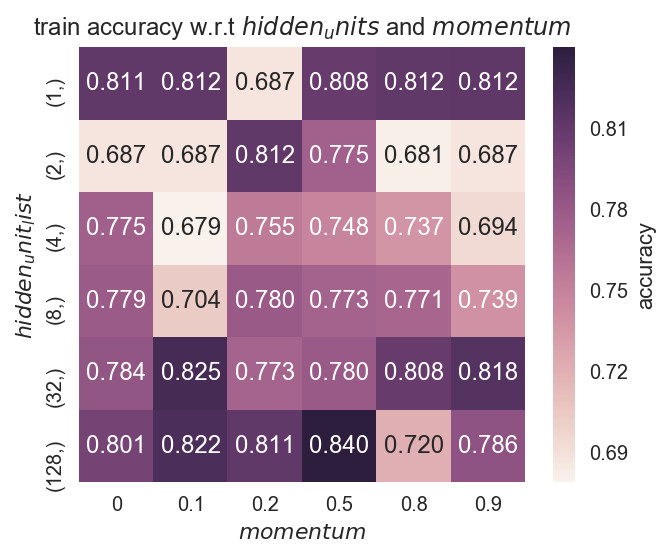

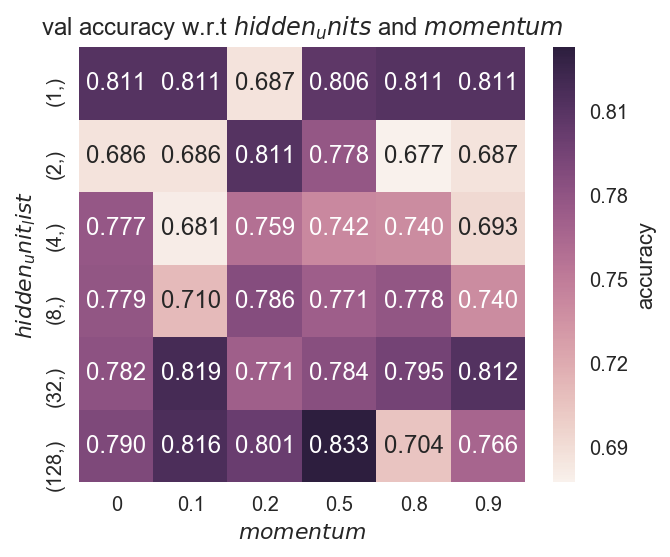

(6, 6) (6, 6)


In [26]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(6,6)
draw_heatmap_RBF(train_acc, 'train accuracy', momentum_list, hidden_unit_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(6,6)
draw_heatmap_RBF(val_acc, 'val accuracy',momentum_list, hidden_unit_list)
print(train_acc.shape, val_acc.shape)

In [37]:
test_acc = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc)
tot_train = (sum(train_acc))/len(train_acc)
tot_train = (sum(tot_train)/len(tot_train))
print(tot_train)
tot_val = (sum(val_acc)/len(val_acc))
tot_val = (sum(tot_val)/len(tot_val))
print(tot_val)

{'hidden_layer_sizes': (128,), 'momentum': 0.5}
0.71
0.765858362255
0.763736111111


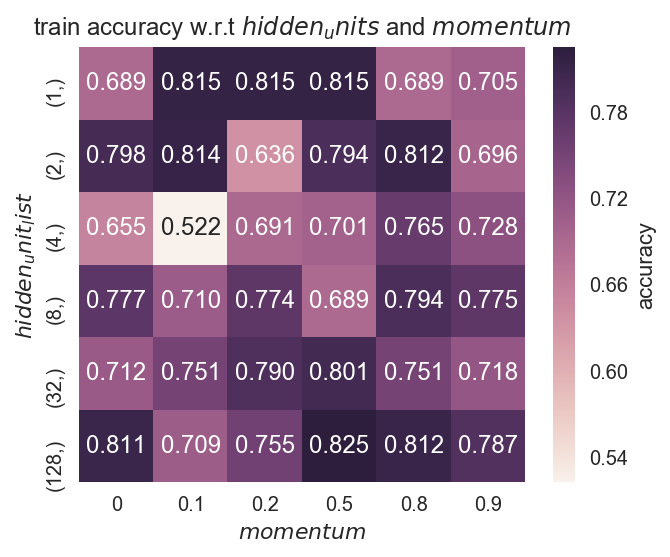

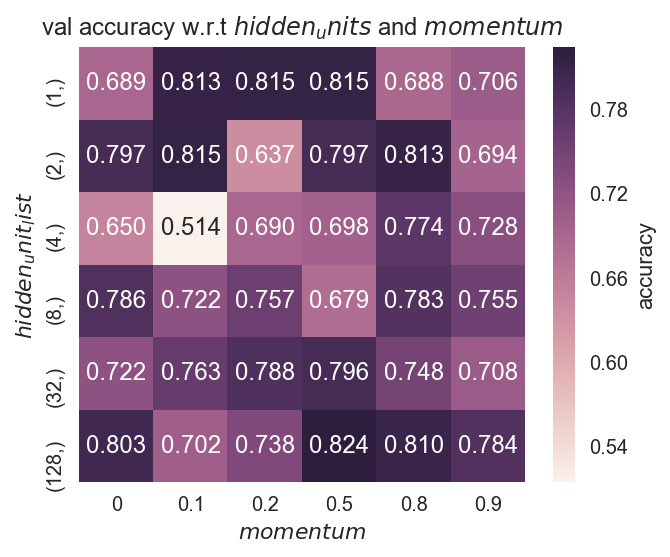

In [38]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc2 = grid_search.cv_results_['mean_train_score'].reshape(6,6)
draw_heatmap_RBF(train_acc2, 'train accuracy', momentum_list, hidden_unit_list)

val_acc2 = grid_search.cv_results_['mean_test_score'].reshape(6,6)
draw_heatmap_RBF(val_acc2, 'val accuracy',momentum_list, hidden_unit_list)

In [39]:
test_acc2 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc2)
tot_train2 = (sum(train_acc2))/len(train_acc2)
tot_train2 = (sum(tot_train2)/len(tot_train2))
print(tot_train2)
tot_val2 = (sum(val_acc2)/len(val_acc2))
tot_val2 = (sum(tot_val2)/len(tot_val2))
print(tot_val2)

{'hidden_layer_sizes': (128,), 'momentum': 0.5}
0.8324
0.746706022079
0.744522222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neura

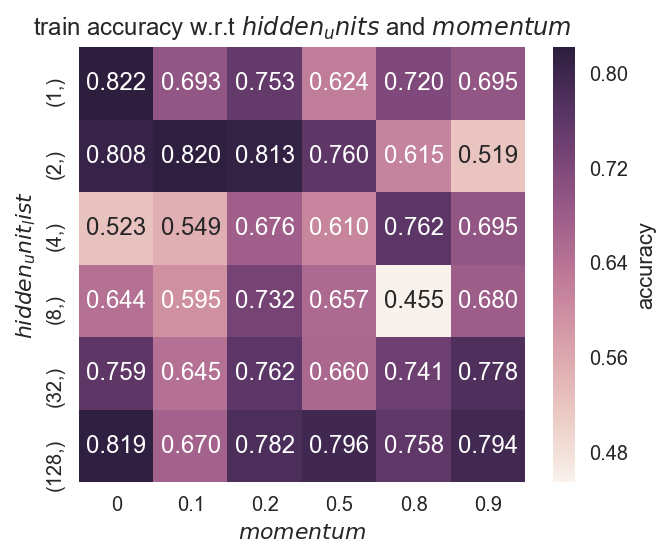

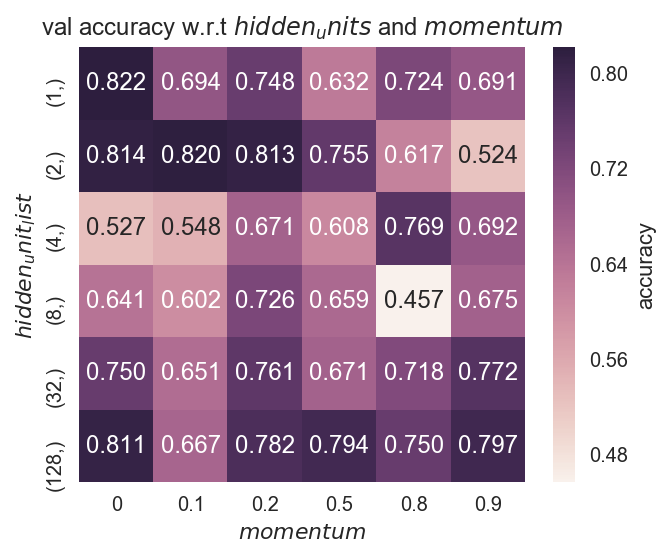

In [40]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc3 = grid_search.cv_results_['mean_train_score'].reshape(6,6)
draw_heatmap_RBF(train_acc3, 'train accuracy', momentum_list, hidden_unit_list)

val_acc3 = grid_search.cv_results_['mean_test_score'].reshape(6,6)
draw_heatmap_RBF(val_acc3, 'val accuracy',momentum_list, hidden_unit_list)

In [41]:
test_acc3 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc3)
tot_train3 = (sum(train_acc3))/len(train_acc3)
tot_train3 = (sum(tot_train3)/len(tot_train3))
print(tot_train3)
tot_val3 = (sum(val_acc3)/len(val_acc3))
tot_val3 = (sum(tot_val3)/len(tot_val3))
print(tot_val3)

{'hidden_layer_sizes': (1,), 'momentum': 0}
0.806
0.699454903044
0.698694444444


In [44]:
avg_test = (test_acc + test_acc2 + test_acc3)/3
avg_train = (tot_train + tot_train2 + tot_train3)/3
avg_val = (tot_val + tot_val2 + tot_val3)/3
print(avg_test, avg_train, avg_val)

0.7828 0.737339762459 0.735650925926
